In [4]:
Pkg.add("MLBase")
Pkg.add("Bootstrap")

INFO: Nothing to be done
INFO: Cloning cache of Bootstrap from git://github.com/juliangehring/Bootstrap.jl.git
INFO: Cloning cache of Lexicon from git://github.com/MichaelHatherly/Lexicon.jl.git
INFO: Installing Bootstrap v0.3.3
INFO: Installing Lexicon v0.1.18
INFO: Package database updated


In [5]:
using DataFrames
using Pyplot; pyplot = PyPlot
using Distributions
using Gadfly
using GLM
using MLBase
using Bootstrap

INFO: Precompiling module Bootstrap...


In [6]:
names = [:fno,:fileno, :energy_init, :energy_final, :forward, :backward, :quality];

In [7]:
data = readtable("quality.data.cleaned", separator=' ', 
                header = false, names = names);

In [8]:
versioninfo()

Julia Version 0.4.7-pre+1
Commit 57d0834 (2016-06-19 17:17 UTC)
Platform Info:
  System: Darwin (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i5-4250U CPU @ 1.30GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.3


In [9]:
head(data)

,fno,fileno,energy_init,energy_final,forward,backward,quality
1,1,1,-9973.7249,-9972.6369,2.4679,1.3799,good
2,1,2,-9973.7249,-9972.8239,2.217,1.316,bad
3,1,3,-9973.7249,-9973.2791,2.3836,1.9378,good
4,1,4,-9973.7249,-9973.1842,2.4733,1.9326,interesting
5,1,5,-9973.7249,-9973.7036,2.3563,2.335,ok
6,1,6,-9973.7249,-9973.373,2.2411,1.8892,interesting


In [10]:
okdata = vcat(data[data[:quality].=="good", :], 
                data[data[:quality].=="ok", :],
                data[data[:quality].=="beautiful", :]);
baddata = data[data[:quality] .== "bad", :];
interestingdata = vcat(data[data[:quality].=="interesting", :], 
                        data[data[:quality].=="super", :]);

println("ok data size: ", size(okdata,1)/size(data,1))
println("bad data size: ", size(baddata,1)/size(data,1))
println("interesting data size: ", size(interestingdata,1))

ok data size: 0.40540540540540543
bad data size: 0.5052552552552553
interesting data size: 119


In [12]:
a = zeros(maximum(okdata[:fno]));
for i=1:size(a,1)
    a[i] = minimum(array(okdata[(okdata[:fno] .==i), [:energy_init, :energy_final]]))
end
okdata[:ref_energy] =zeros(size(okdata,1));

for i=1:size(okdata, 1)
    okdata[i,:ref_energy] = a[okdata[i, :fno]]
end

 in depwarn at deprecated.jl:73
 in array at deprecated.jl:50
 [inlined code] from In[12]:3
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/KedarKolluri/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /Users/KedarKolluri/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[12], in expression starting on line 2
 in depwarn at deprecated.jl:73
 in array at deprecated.jl:50
 [inlined code] from In[12]:3
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/KedarKolluri/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /Users/KedarKolluri/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[12], in expression starting on line 2


In [13]:
en_lowest = minimum(vcat(okdata[:energy_final], okdata[:energy_init]))

-9975.0797

In [41]:
println(okdata[okdata[:quality].=="beautiful", :])

1×8 DataFrames.DataFrame
│ Row │ fno │ fileno │ energy_init │ energy_final │ forward │ backward │
├─────┼─────┼────────┼─────────────┼──────────────┼─────────┼──────────┤
│ 1   │ 7   │ 35     │ -9970.52    │ -9970.43     │ 2.4708  │ 2.3802   │

│ Row │ quality     │ ref_energy │
├─────┼─────────────┼────────────┤
│ 1   │ "beautiful" │ -9971.18   │


In [15]:
head(okdata)

,fno,fileno,energy_init,energy_final,forward,backward,quality,ref_energy
1,1,1,-9973.7249,-9972.6369,2.4679,1.3799,good,-9974.1476
2,1,3,-9973.7249,-9973.2791,2.3836,1.9378,good,-9974.1476
3,1,8,-9973.7249,-9972.6879,2.5942,1.5572,good,-9974.1476
4,1,23,-9973.7249,-9973.804,1.9297,2.0088,good,-9974.1476
5,1,27,-9973.7249,-9973.5659,2.2485,2.0895,good,-9974.1476
6,1,30,-9973.7249,-9973.4765,2.8236,2.5752,good,-9974.1476


We consider the forward reaction and reverse reaction as different data point. Therefore our data doubles

In [16]:
data_diff_barrier = DataFrame(
            en_diff = okdata[:energy_final]-okdata[:energy_init],
            en_rel  = okdata[:energy_init]-okdata[:ref_energy],
            barrier= okdata[:forward], quality=okdata[:quality]);
b2 = DataFrame(
        en_diff = okdata[:energy_init]-okdata[:energy_final],
        en_rel  = okdata[:energy_final]-okdata[:ref_energy],
        barrier = okdata[:backward], quality = okdata[:quality]);
data_diff_barrier = vcat(data_diff_barrier, b2);

In [17]:
all_data_diff_barrier = DataFrame(
en_diff = data[:energy_final]-data[:energy_init],
en_rel  = data[:energy_init]-en_lowest,
barrier= data[:forward], quality=data[:quality]);
all_b2 = DataFrame(
en_diff = data[:energy_init]-data[:energy_final],
en_rel  = data[:energy_final]-en_lowest,
barrier = data[:backward], quality = data[:quality]);
all_data_diff_barrier = vcat(all_data_diff_barrier, all_b2);
all_data_diff_barrier = all_data_diff_barrier[(abs(all_data_diff_barrier[:en_diff]) .< 2.5), :];
all_data_diff_barrier = all_data_diff_barrier[(abs(all_data_diff_barrier[:barrier]) .< 4.5), :];

In [12]:
#Below I set the value to ting to make it same for all.. this is only for test.. please remove it after
#data_diff_barrier = all_data_diff_barrier;

In [18]:
std(data_diff_barrier[:en_rel])

0.44288301413529596

In [33]:
2.35*evtokcal*kcaltokj

226.74399316000003

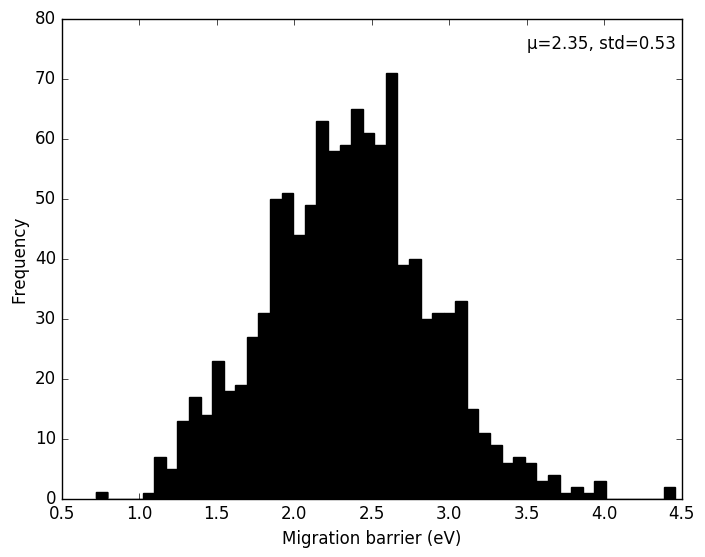

PyObject <matplotlib.text.Text object at 0x32e3b3908>

In [29]:
label="µ=2.35, std=0.53"
pyplot.plt[:hist](data_diff_barrier[:barrier], bins = 50, color="black")
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
pyplot.xlabel("Migration barrier (eV)")
pyplot.ylabel("Frequency")
pyplot.text(3.5, 75, label)

In [36]:
evtokcal=23.0609
kcaltokj=4.18400
label="µ=2.35, std=0.53"
pyplot.plt[:hist](data_diff_barrier[:barrier], bins = 50, color="black")
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
pyplot.xlabel("Migration barrier (eV)")
pyplot.ylabel("Frequency")
pyplot.text(3.5, 75, label)
pyplot.savefig("barriers_histgram_eV.png",bbox_inches="tight", dpi=600)

pyplot.clf()

label="µ=54.19, std=12.22"
pyplot.plt[:hist](data_diff_barrier[:barrier]*evtokcal, bins = 50, color="black")
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
pyplot.xlabel("Migration barrier (KCal/mol)")
pyplot.ylabel("Frequency")
pyplot.text(3.5*evtokcal, 75, label)
pyplot.savefig("barriers_histgram_KCalmol.png",bbox_inches="tight", dpi=600)
pyplot.clf()

label="µ=226.74, std=51.13"
pyplot.plt[:hist](data_diff_barrier[:barrier]*evtokcal*kcaltokj, bins = 50, color="black")
PyPlot.matplotlib[:rcParams]["font.sans-serif"] = "Arial"
pyplot.xlabel("Migration barrier (KJ/mol)")
pyplot.ylabel("Frequency")
pyplot.text(3.5*evtokcal*kcaltokj-10, 75, label)
pyplot.savefig("barriers_histgram_KJmol.png",bbox_inches="tight", dpi=600)
pyplot.clf()

println(mean(data_diff_barrier[:barrier]), " ", std(data_diff_barrier[:barrier]))

2.349101111111111 0.5313101612175667


In [49]:
singplot = readtable("7/neb_en.35", separator=' ', header = false);

LoadError: LoadError: SystemError: opening file 7/neb_en.35: No such file or directory
while loading In[49], in expression starting on line 1

In [42]:
writetable("data_differences_barriers.data", data_diff_barrier, separator=',')

In [23]:
test = string(mean(data_diff_barrier[:barrier]), " ", std(data_diff_barrier[:barrier]))œå≈©†¥˙˜ç´®√

"2.349101111111111 0.5313101612175667"

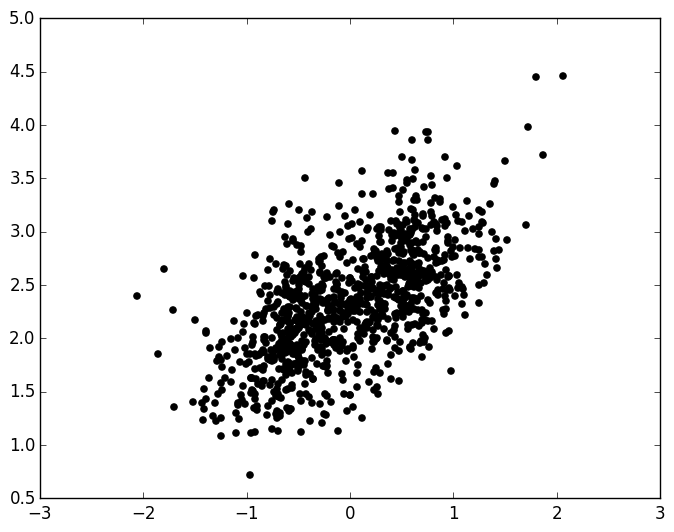

In [15]:
pyplot.scatter(data_diff_barrier[:en_diff], data_diff_barrier[:barrier], c= "black")
pyplot.savefig("endiff_barrier.png")

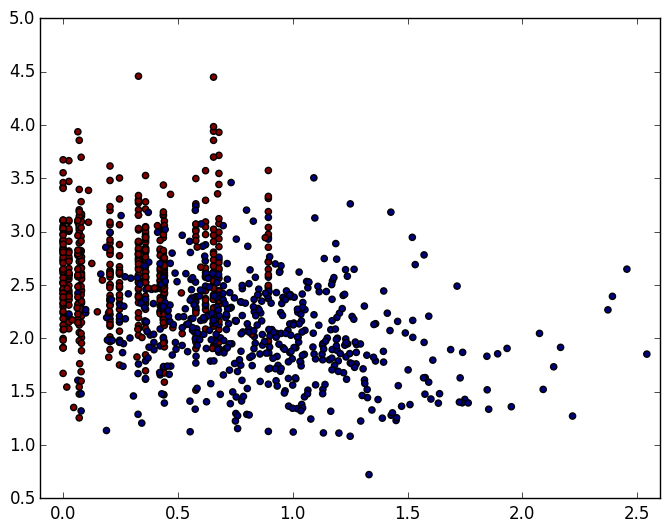

In [16]:
pyplot.scatter(data_diff_barrier[:en_rel], data_diff_barrier[:barrier],
c=sign(data_diff_barrier[:en_diff]))
pyplot.xlim([-0.1, 2.6])
pyplot.savefig("enrel_barrier.png")

2.388712981199642
2.34910111111111


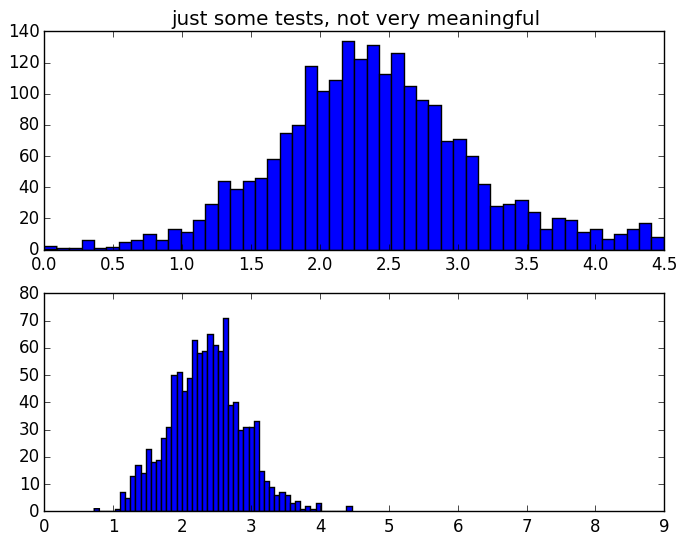

In [17]:

pyplot.subplot(2,1,1)
pyplot.title("just some tests, not very meaningful")
pyplot.hist(all_data_diff_barrier[:barrier], 50)
println(mean(all_data_diff_barrier[(all_data_diff_barrier[:barrier] .< 4.5), :barrier]))
pyplot.subplot(2,1,2)
pyplot.hist(data_diff_barrier[:barrier], 50);
pyplot.xlim([0,9]);
println(mean(data_diff_barrier[:barrier]))


some interesting data

In [18]:
size(okdata[[okdata[:forward] .< 1.5],: ],1)

7

In [19]:
size(okdata[[okdata[:backward] .< 1.5],: ],1)

63

In [20]:
mean(data_diff_barrier[:barrier] .< 2.0)

0.25925925925925924

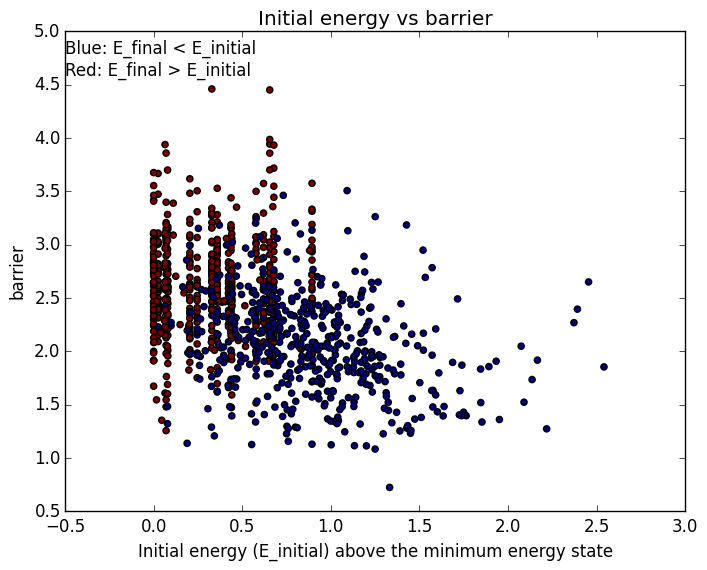

PyObject <matplotlib.text.Text object at 0x11798ed10>

In [21]:
pyplot.scatter(data_diff_barrier[:en_rel], data_diff_barrier[:barrier],
c=sign(data_diff_barrier[:en_diff]))
pyplot.title("Initial energy vs barrier ")
pyplot.xlabel("Initial energy (E_initial) above the minimum energy state")
pyplot.ylabel("barrier")
pyplot.text(-0.5, 4.8, "Blue: E_final < E_initial" )
pyplot.text(-0.5, 4.6, "Red: E_final > E_initial" )

From above graph, we can conculde that almost all low barriers belong to cases where initial energy is higher than final energy

In [46]:
modelall = GLM.fit(LinearModel, barrier ~ en_diff + en_rel, data_diff_barrier)

DataFrameRegressionModel{LinearModel{DensePredQR{Float64}},Float64}:

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   2.28578 0.0281358 81.2409   <1e-99
en_diff      0.553751 0.0288374 19.2025   <1e-70
en_rel       0.107501 0.0426109 2.52286   0.0118


Normal(μ=-9.626044817212932e-16, σ=0.41717479314431183)


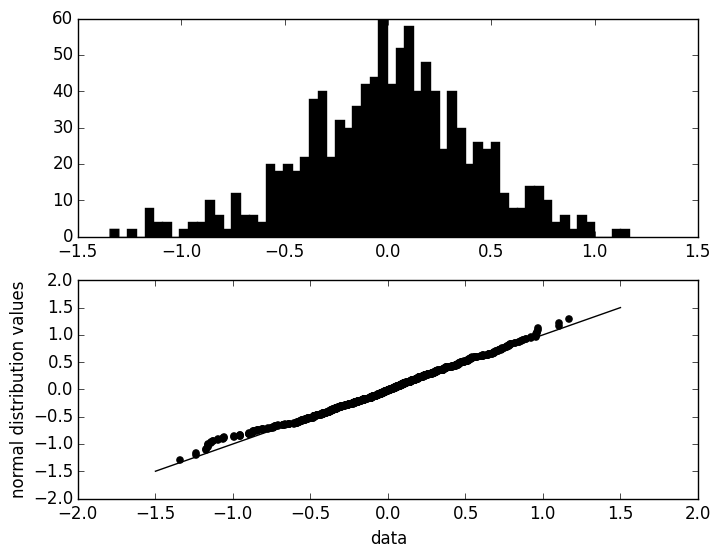

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11acc7410>

In [49]:
pyplot.subplot(2, 1, 1)
dely = modelall.model.rr.mu-modelall.model.rr.y;
pdel = fit(Normal, dely)
println(pdel)
pyplot.hist(dely, bins=60, color="black");
pyplot.subplot(2, 1, 2)
qqpair = qqbuild(dely, fit(Normal, dely));
pyplot.scatter(qqpair.qx, qqpair.qy, c="black")
pyplot.xlabel("data")
pyplot.ylabel("normal distribution values")
#pyplot.xlim([-1.5, 1.5])
#pyplot.ylim([-1.5, 1.5])
pyplot.plot([-1.5, 1.5], [-1.5, 1.5], color="black")

In [22]:
modeldiff = GLM.fit(LinearModel, barrier ~ en_diff, data_diff_barrier)

DataFrameRegressionModel{LinearModel{DensePredQR{Float64}},Float64}:

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)    2.3491 0.0127435 184.337   <1e-99
en_diff           0.5 0.0194821 25.6646   <1e-99


Normal(μ=-1.3618735768735254e-15, σ=0.418405677231447)


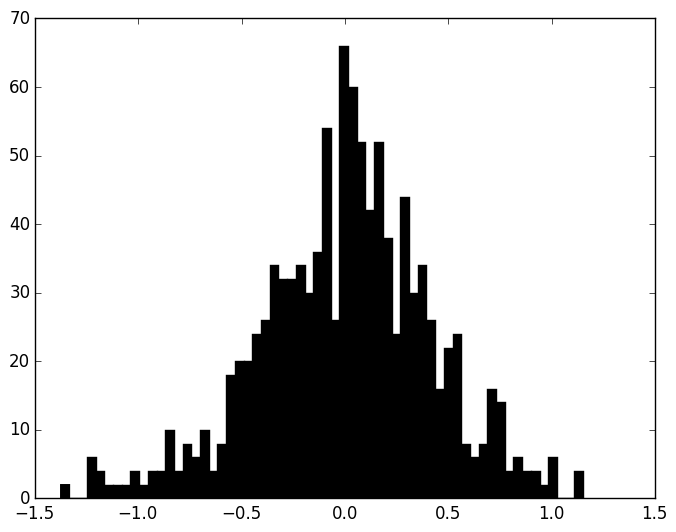

In [23]:
dely = modeldiff.model.rr.mu-modeldiff.model.rr.y;
pdel = fit(Normal, dely)
println(pdel)
pyplot.hist(dely, bins=60, color="black");
pyplot.xlim([-1.5, 1.5])
pyplot.savefig("residual_endiff.png")

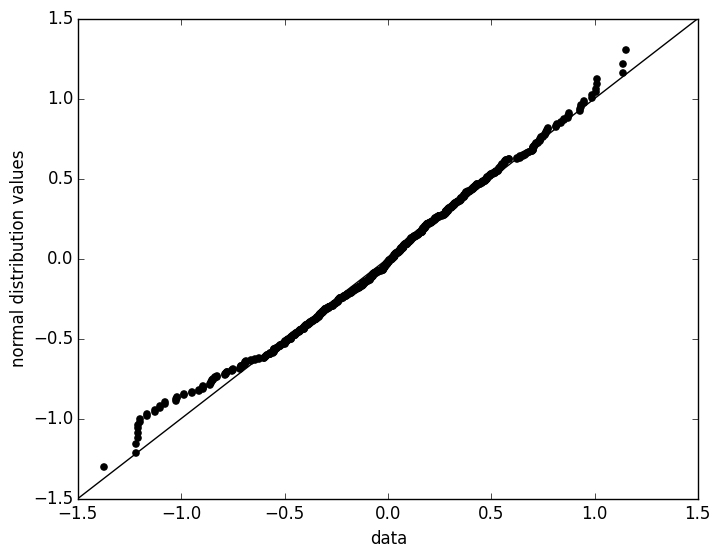

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11764b090>

In [24]:
qqpair = qqbuild(dely, fit(Normal, dely));
pyplot.scatter(qqpair.qx, qqpair.qy, c="black")
pyplot.xlabel("data")
pyplot.ylabel("normal distribution values")
pyplot.xlim([-1.5, 1.5])
pyplot.ylim([-1.5, 1.5])
pyplot.plot([-1.5, 1.5], [-1.5, 1.5], color="black")

In [25]:
modelinit = GLM.fit(LinearModel, barrier ~ en_rel, data_diff_barrier)

DataFrameRegressionModel{LinearModel{DensePredQR{Float64}},Float64}:

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    2.64188 0.0245042  107.813   <1e-99
en_rel       -0.497023 0.0332551 -14.9458   <1e-45


In [26]:
modelinit_intercept_for_bs(df::DataFrame) = coef(GLM.fit(LinearModel, barrier ~ en_rel, df).model)[1]
modelinit_slope_for_bs(df::DataFrame) = coef(GLM.fit(LinearModel, barrier ~ en_rel, df).model)[2]

modelinit_slope_for_bs (generic function with 1 method)

In [27]:
bs_intercept = boot_basic(data_diff_barrier, modelinit_intercept_for_bs, 100000);
bs_slope = boot_basic(data_diff_barrier, modelinit_slope_for_bs, 100000);

In [28]:
size(bs_intercept.

LoadError: syntax: incomplete: premature end of input
while loading In[28], in expression starting on line 1

In [29]:
println("Intercept mean and sd ", mean(Bootstrap.straps(bs_intercept)), " ", Bootstrap.se(bs_intercept))
println("Slope mean and sd ", mean(Bootstrap.straps(bs_slope)), " ", Bootstrap.se(bs_slope))

println("Intercept CI", Bootstrap.ci(bs_intercept, level=0.999))
println("Slope CI", Bootstrap.ci(bs_slope, level=0.999))

Intercept mean and sd 2.642079827142112 0.024559396172265296
Slope mean and sd -0.4972976030151542 0.03385777647917018
Intercept CIBootstrap Confidence Interval
  Method:   basic
  Level:    0.999
  t0:       2.6418779229840617
  Interval: [2.5614438792944565,2.723220957166743]

Slope CIBootstrap Confidence Interval
  Method:   basic
  Level:    0.999
  t0:       -0.49702265912508625
  Interval: [-0.6083958749306586,-0.38708719900061317]



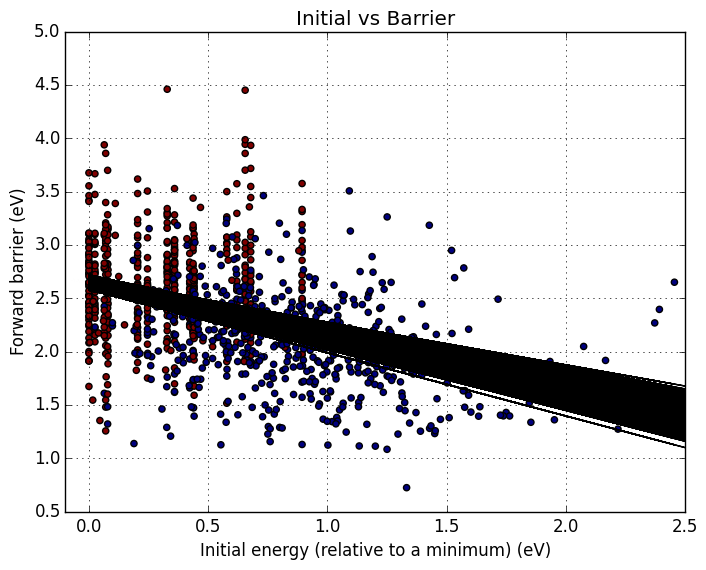

In [30]:
pyplot.scatter(data_diff_barrier[:en_rel], data_diff_barrier[:barrier], c=sign(data_diff_barrier[:en_diff]))
#,c=labelencode(labelmap(data_diff_barrier[:quality]), data_diff_barrier[:quality]))
pyplot.plot(modelinit.model.pp.X[:,2], modelinit.model.rr.mu, "k")
for i = 1:1000#in size(bs_intercept.t1,1)
    pyplot.plot(modelinit.model.pp.X[:,2], modelinit.model.pp.X[:,2]*bs_slope.t1[i]+bs_intercept.t1[i],"k")
end
#pyplot.plot([-3, 4], [2.027, 2.027], "black");

#pyplot.plot([-3, 4], [3.6712 , 3.6712 ], "black");
pyplot.xlim([-0.1, 2.5])
pyplot.title("Initial vs Barrier")
pyplot.xlabel("Initial energy (relative to a minimum) (eV)")
pyplot.ylabel("Forward barrier (eV)")
pyplot.grid()

In [31]:
modeldiff = GLM.fit(LinearModel, barrier ~ en_diff, data_diff_barrier)

DataFrameRegressionModel{LinearModel{DensePredQR{Float64}},Float64}:

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)    2.3491 0.0127435 184.337   <1e-99
en_diff           0.5 0.0194821 25.6646   <1e-99


Normal(μ=-2.0535014018437155e-15, σ=0.48334240869632755)


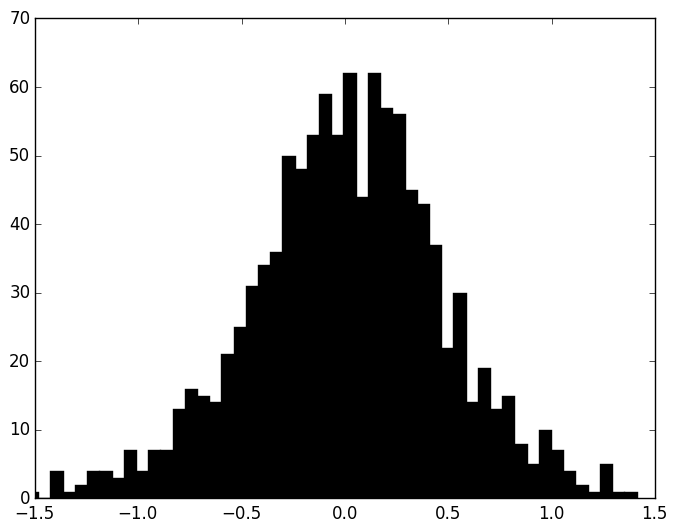

In [32]:
dely = modelinit.model.rr.mu-modelinit.model.rr.y;
pdel = fit(Normal, dely)
println(pdel)
pyplot.hist(dely, bins=60, color="black");
pyplot.xlim([-1.5, 1.5])
pyplot.savefig("residual.png")

In [33]:
println(kurtosis(dely))
println(kurtosis(rand(fit(Normal, dely), size(dely, 1)*2)))

0.8637867020196484
-0.22146858077321907


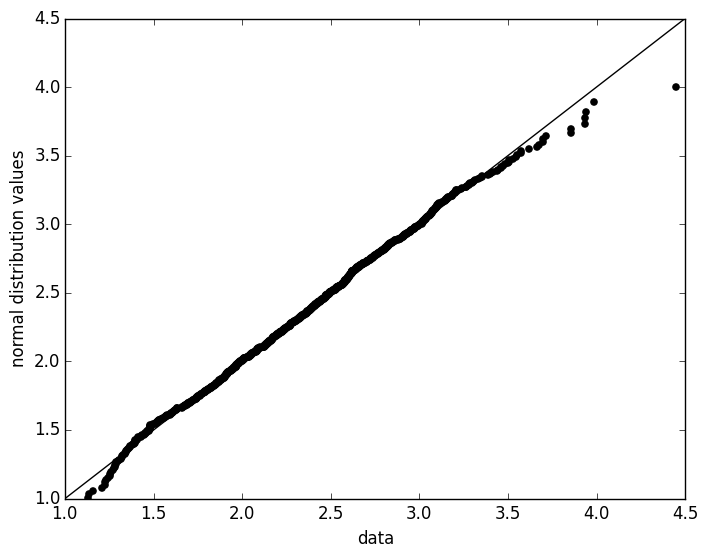

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1198b8c10>

In [34]:

qqpair = qqbuild(float(data_diff_barrier[:barrier]), fit(Normal, float(data_diff_barrier[:barrier])));
pyplot.scatter(qqpair.qx, qqpair.qy, c="black")
pyplot.xlabel("data")
pyplot.ylabel("normal distribution values")
pyplot.xlim([1, 4.5])
pyplot.ylim([1, 4.5])
pyplot.plot([1, 4.5], [1, 4.5], color="black")

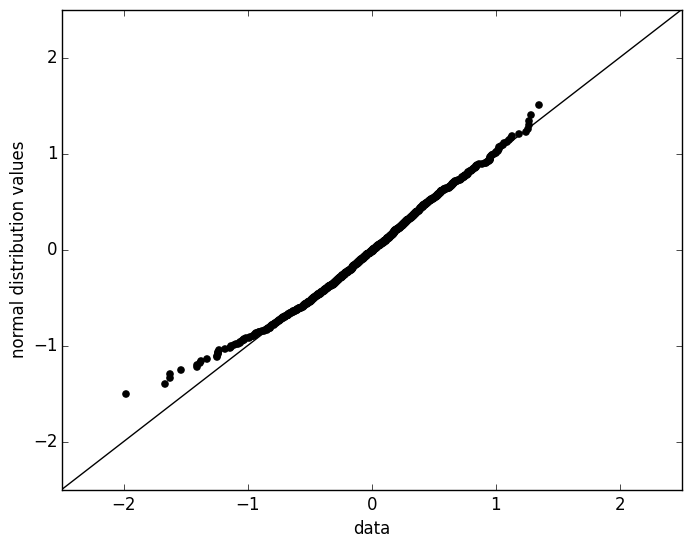

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x119b09d10>

In [35]:
qqpair = qqbuild(dely, fit(Normal, dely));
pyplot.scatter(qqpair.qx, qqpair.qy, c="black")
pyplot.xlabel("data")
pyplot.ylabel("normal distribution values")
pyplot.xlim([-2.5, 2.5])
pyplot.ylim([-2.5, 2.5])
pyplot.plot([-2.5, 2.5], [-2.5, 2.5], color="black")

#### Regression model suggests that when the initial and final states have the same energy, the barrier is 2.3491eV with std = 0.013eV

#### Regression further suggests that for every 1eV in energy difference, there is a 0.5 eV increase in the barrier. Not sure if it makes sense

In [36]:
pyplot.scatter(data_diff_barrier[:en_diff], data_diff_barrier[:barrier])
#,c=labelencode(labelmap(data_diff_barrier[:quality]), data_diff_barrier[:quality]))
pyplot.plot(model.model.pp.X[:,2], model.model.rr.mu, "k")
#pyplot.plot([-3, 4], [2.027, 2.027], "black");

#pyplot.plot([-3, 4], [3.6712 , 3.6712 ], "black");
#pyplot.xlim([-2, 2])
pyplot.title("Initial-Final vs Barrier")
pyplot.xlabel("Difference in the energy of initial and final energies (eV)")
pyplot.ylabel("Forward barrier (eV)")
pyplot.grid()


LoadError: model not defined
while loading In[36], in expression starting on line 3

In [37]:
pyplot.scatter(all_data_diff_barrier[:en_diff], all_data_diff_barrier[:barrier])
pyplot.plot(allmodel.model.pp.X[:,2], allmodel.model.rr.mu, "k")

#pyplot.xlim([-2, 2])
pyplot.title("All values (little pruning) initial-Final vs Barrier; its also meaningless")
pyplot.xlabel("Difference in the energy of initial and final energies (eV)")
pyplot.ylabel("Forward barrier (eV)")
pyplot.grid()

LoadError: allmodel not defined
while loading In[37], in expression starting on line 2

In [38]:
function Rsquared(regmodel::RegressionModel)
    #warn("this is accurate only for linear regression!")
    ss_rs = deviance(regmodel.model.rr)
    ss_tot = sum(abs2(regmodel.model.rr.y-mean(regmodel.model.rr.y)))
    return 1 - ss_rs/ss_tot
end
function linearAIC(regmodel::RegressionModel)
    return log(deviance(regmodel.model.rr)/length(regmodel.model.rr.y))*length(regmodel.model.rr.y)
              + 2*length(coef(regmodel.model))
end

linearAIC (generic function with 1 method)

In [39]:
rsq = Rsquared(modelinit); println("Rsquared value for this fit is :", rsq)
aic = linearAIC(modelinit); println("AIC value is :", aic, " but not much meaning here")

rsqdiff = Rsquared(modeldiff); println("Rsquared value for this fit is :", rsqdiff)
aicdiff = linearAIC(modeldiff); println("AIC value is :", aicdiff, " but not much meaning here")

Rsquared value for this fit is :0.1716461954784232
AIC value is :-1570.3847045254354 but not much meaning here
Rsquared value for this fit is :0.3792721879115717
AIC value is :-1882.0162024156818 but not much meaning here


#### R-squared value of the fit suggests that only 37% of the variability in the barrier may be attributed to difference in the energies

In [40]:
dely = model.model.rr.mu-model.model.rr.y;
pdel = fit(Normal, dely)
pyplot.hist(dely, bins=30);

LoadError: model not defined
while loading In[40], in expression starting on line 1

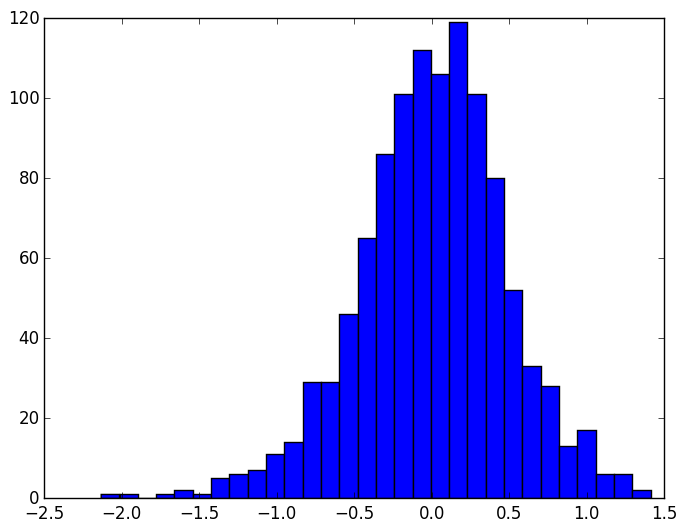

In [41]:
pyplot.hist(dely, bins=30);

let's say we want to predict the barrier for a transition where e_diff = 1.0
according to the formula, s_x = se*sqrt(1+1/n+(x-xbar)^2/(x^2-nxbar2))

In [42]:
x=1.0
xbar = mean(model.model.pp.X[:,2])
n = size(model.model.pp.X[:,2], 1)
xsq = sum(model.model.pp.X[:,2].^2);
sigmasq = sqrt(deviance(model.model.rr)/df_residual(model.model));
println(x, " ", xbar, " " , n, " ", xsq, " ", sigmasq)
s_x_rel = sqrt(1+1/n+(x-xbar)^2/(xsq-n*xbar^2))
s_x = s_x_rel*sigmasq
mean_pred = predict(model, DataFrame(en_diff=[1.0]));
(mean_pred-1.96*s_x, mean_pred, mean_pred+1.96*s_x)

LoadError: model not defined
while loading In[42], in expression starting on line 2

In [43]:
p_init = fit(Normal, float(okdata[:energy_init]))
println("Initial energies :", p_init)

p_final = fit(Normal, float(okdata[:energy_final]))
println("\nFinal energies :", p_final)

p_diff = fit(Normal, float(okdata[:energy_init]-okdata[:energy_final]) )
println("\nEnergy differences :", p_diff)

p_forward = fit(Normal, float(okdata[:forward]))
println("\nForward barriers: ", p_forward)

p_backward = fit(Normal, float(okdata[:backward]))
println("\nReverse barriers: ", p_backward)

p_all = fit(Normal, float(data_diff_barrier[:barrier]))
println("\nAll barriers: ", p_all)

Initial energies :Normal(μ=-9971.792540925884, σ=1.5666611351825679)

Final energies :Normal(μ=-9971.283026481482, σ=1.5826238954316525)

Energy differences :Normal(μ=-0.5095144444443847, σ=0.41019290251394314)

Forward barriers: Normal(μ=2.6038583333333314, σ=0.46956710574839666)

Reverse barriers: Normal(μ=2.0943438888888877, σ=0.4623445288034739)

All barriers: Normal(μ=2.349101111111116, σ=0.5310641273255982)


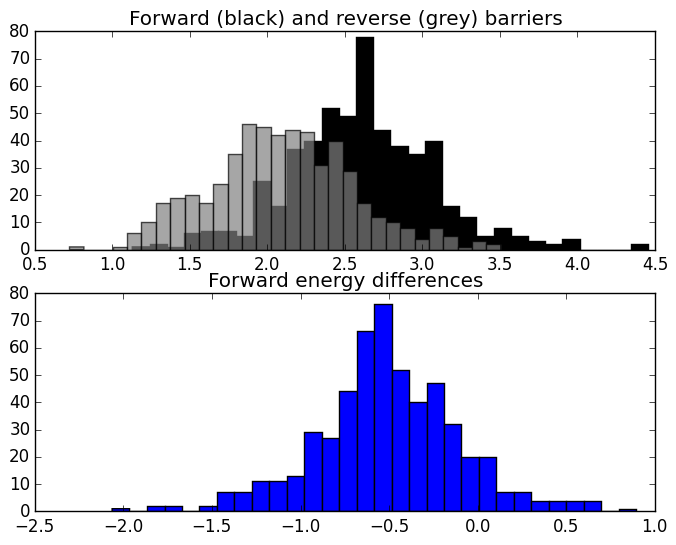

PyObject <matplotlib.text.Text object at 0x11a0e76d0>

In [44]:
pyplot.subplot(2, 1, 1)
pyplot.hist(okdata[:forward], bins=30, color="black");
pyplot.hist(okdata[:backward], bins=30, color="grey", alpha=0.7);
pyplot.title("Forward (black) and reverse (grey) barriers")
pyplot.subplot(2,1, 2)
pyplot.hist(okdata[:energy_init]-okdata[:energy_final], bins=30);
pyplot.title("Forward energy differences")

# Some tests for error determination
## This thing about errors is making crazy. Can't get the derivation of error right

In [45]:
#radios = readtable("/Users/KedarKolluri/Downloads/radios.txt", separator = ' ')
#radio2vmodel = fit(LinearModel, defects ~ lengths + licenses, radios)
radio2vmodel = fit(LinearModel, defects ~ lengths , radios)
println(radio2vmodel)
x_length=8
x_licenses=1.6
x_length_bar = mean(radio2vmodel.model.pp.X[:,2])
#x_licenses_bar = mean(radio2vmodel.model.pp.X[:,3])

n = size(radio2vmodel.model.pp.X[:,2], 1)
println(n)
x_length_sq = sum(radio2vmodel.model.pp.X[:,2].^2);

#x_licenses_sq = sum(radio2vmodel.model.pp.X[:,3].^2);
println(df_residual(radio2vmodel.model))
sigmasq = sqrt(deviance(radio2vmodel.model.rr)/df_residual(radio2vmodel.model));
println("sigma sq ", sigmasq)
#println(x_length_bar, " ", x_licenses_bar, " " , n, " ", x_length_sq, " ", x_licenses_sq ," ", sigmasq)

s_x_length_rel_sq =  (x_length-x_length_bar)^2/(x_length_sq-n*x_length_bar^2)
println(sqrt(s_x_length_rel_sq))

#s_x_licenses_rel_sq = (x_licenses-x_licenses_bar)^2/(x_licenses_sq-n*x_licenses_bar) 

s_x_licenses_rel_sq=0
conforpred=0

s_x_rel = sqrt(conforpred+1/(n)+s_x_length_rel_sq+s_x_licenses_rel_sq)
s_x = s_x_rel*sigmasq
mean_pred = predict(radio2vmodel, DataFrame(lengths=[x_length], licenses=[x_licenses]))
(mean_pred-1.96*s_x, mean_pred, mean_pred+1.96*s_x)

LoadError: radios not defined
while loading In[45], in expression starting on line 3